## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Organizing Data

In [4]:
# for lists the order is [columns, rows]
# for numpy the order is [rows, columns]

datafile = "ex1data2.txt"
cols = np.loadtxt(datafile, delimiter=",", usecols=(0,1,2), unpack=True)
inputs = np.transpose(np.array(cols[:2,:]))
price = np.transpose(np.array(cols[2:,:]))
m = price.size

inputs = np.insert(inputs, 0, 1, axis=1)

In [5]:
alpha = 0.01
iterations = 1500

## Normalizing Features

In [6]:
stored_feature_means = []
stored_feature_stdev = []
inputs_norm = inputs.copy()
for column in range(inputs_norm.shape[1]): #shape[]: [0] = # of rows, [1] = # of columns
    stored_feature_means.append(np.mean(inputs_norm[:,column])) # all rows for each iterating column
    stored_feature_stdev.append(np.std(inputs_norm[:,column]))
    # skip the 1st row
    if not column: continue
    # actual calulations
    inputs_norm[:,column] = (inputs_norm[:,column] - stored_feature_means[-1])/stored_feature_stdev[-1]
    #inputs_norm shape = (47, 3)

## Gradient Descent

In [7]:
alpha = 0.01
iterations = 1500
initial_theta = np.zeros((inputs_norm.shape[1],1))

In [8]:
# Hypothesis function | shape = (47,1)
def hypothesis_function(theta, X):
    return np.dot(X, theta)

In [35]:
# Cost function | no shape, is a float
# Linear regression cost function is the sum of squarred errors
def cost_function(theta, X, y):
    return float((1/2*m)*np.dot((hypothesis_function(theta,X)-y).T,(hypothesis_function(theta,X)-y)))

In [27]:
# Gradient Descent
def gradient_descent(X, theta_start):
    theta = theta_start
    jvec = []
    for i in range(iterations):
        temptheta = theta
        jvec.append(cost_function(initial_theta,inputs_norm,price))
        for j in range(len(theta)):
            theta[j] = temptheta[j]-(alpha/m)*np.sum((hypothesis_function(initial_theta,inputs_norm)-price)*np.array(inputs_norm[:,j]).reshape(m,1))
        theta = temptheta
    return theta, jvec    

In [30]:
# Actually running the gradient descent
theta, jvec = gradient_descent(inputs_norm, initial_theta)

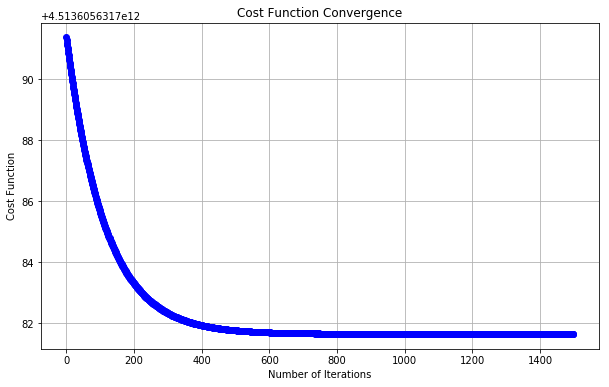

In [34]:
# Plot convergence
def plot_convergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Cost Function Convergence")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost Function")
    
plot_convergence(jvec)